<a href="https://colab.research.google.com/github/HasaanA16/Social-Media-Website-MERN-/blob/master/Copy_of_handPose_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import cv2
import time
import numpy as np

nPoints = 22
POSE_PAIRS = [ [0,1],[1,2],[2,3],[3,4],[0,5],[5,6],[6,7],[7,8],[0,9],[9,10],[10,11],[11,12],[0,13],[13,14],[14,15],[15,16],[0,17],[17,18],[18,19],[19,20] ]


In [20]:
net = cv2.dnn.readNetFromCaffe('/content/pose_deploy.prototxt', '/content/pose_iter_102000.caffemodel')

In [38]:
import math
count = 0
videoFile = "/content/video1.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        #filename ="frame%d.jpg" % count;count+=1
        filename ='Videos/' + "_frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")


Done!


In [59]:
from glob import glob
from keras.preprocessing import image
images = glob("Videos/*.jpg")
prediction_images = []
copy_prediction_images = []
for i in range(len(images)):
       frame = cv2.imread(images[i])
       frameCopy = np.copy(frame)
       frameWidth = frame.shape[1]
       frameHeight = frame.shape[0]
       aspect_ratio = frameWidth/frameHeight
       threshold = 0.3

       t = time.time()
      # input image dimensions for the network
       inHeight = 368
      # inWidth = 368
       inWidth = int(((aspect_ratio*inHeight)*8)//8)
       inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                                (0, 0, 0), swapRB=False, crop=False)

       net.setInput(inpBlob)

       output = net.forward()
       prediction_images.append(output)
       copy_prediction_images.append(frameCopy)

In [ ]:
for img in range(len(prediction_images)):
      output = prediction_images[img]

yes
0.0061608231626451015
Total time taken : 0.240
yes
0.01579870656132698
Total time taken : 0.487
yes
0.0017284131608903408
Total time taken : 0.719
yes
0.009081610478460789
Total time taken : 0.972
yes
0.0030664207879453897
Total time taken : 1.208
yes
0.01325598917901516
Total time taken : 1.461
yes
0.01854751445353031
Total time taken : 1.724
yes
0.0043251290917396545
Total time taken : 1.947
yes
0.024493444710969925
Total time taken : 2.177
yes
0.010247703641653061
Total time taken : 2.409
yes
0.008045719936490059
Total time taken : 2.645
yes
0.006835019215941429
Total time taken : 2.880
yes
0.012054427526891232
Total time taken : 3.133
yes
0.01885358989238739
Total time taken : 3.376
yes
0.019533727318048477
Total time taken : 3.651
yes
0.011454521678388119
Total time taken : 3.905
yes
0.00396003806963563
Total time taken : 4.147
yes
0.01151440478861332
Total time taken : 4.389
yes
0.019564760848879814
Total time taken : 4.624
yes
0.021743901073932648
Total time taken : 4.890
ye

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


yes
0.007492735516279936
Total time taken : 5.394
yes
0.003101813606917858
Total time taken : 5.633
yes
0.0016146599082276225
Total time taken : 5.862
yes
0.0065351794473826885
Total time taken : 6.119
yes
0.01771424524486065
Total time taken : 6.357
yes
0.01359622273594141
Total time taken : 6.608
yes
0.0016725048189982772
Total time taken : 6.832
yes
0.01502524595707655
Total time taken : 7.092
yes
0.021804749965667725
Total time taken : 7.324
yes
0.009907535277307034
Total time taken : 7.547


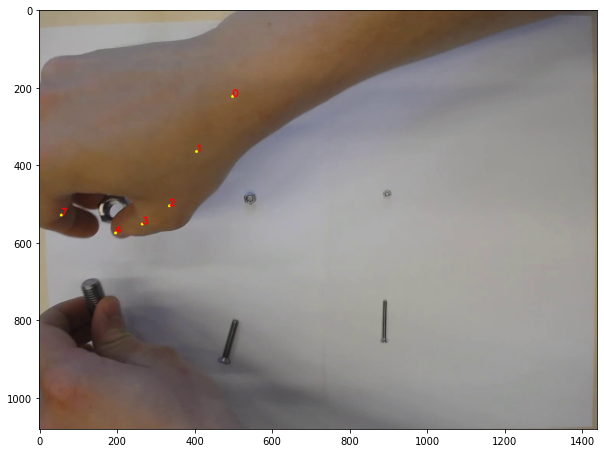

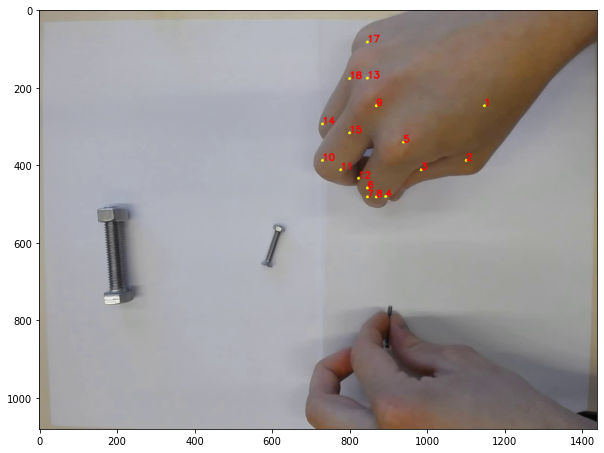

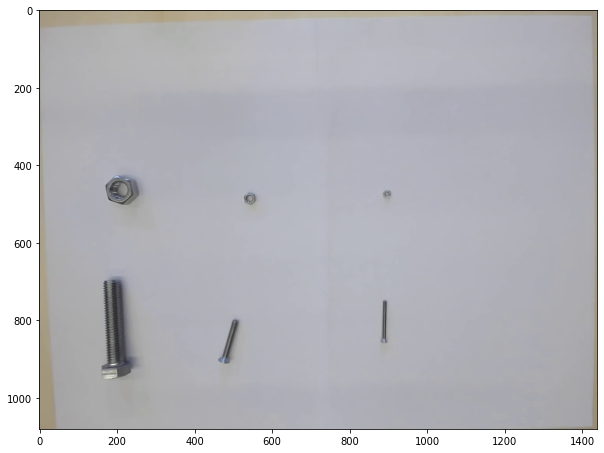

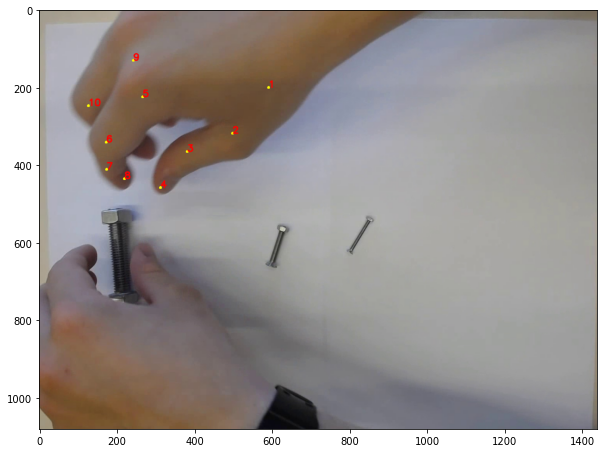

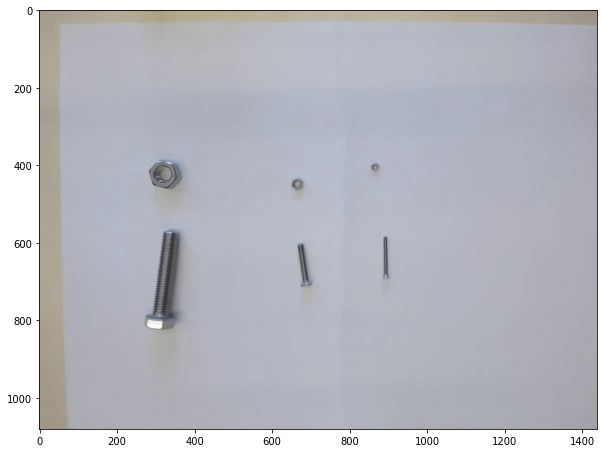

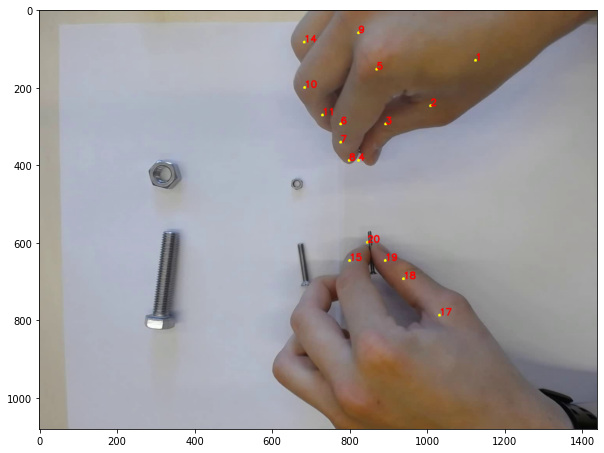

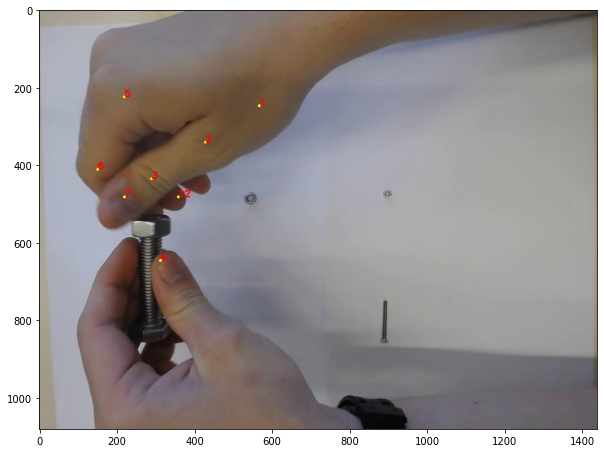

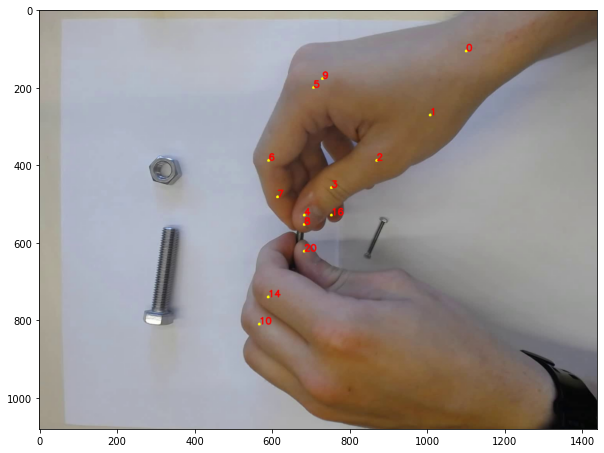

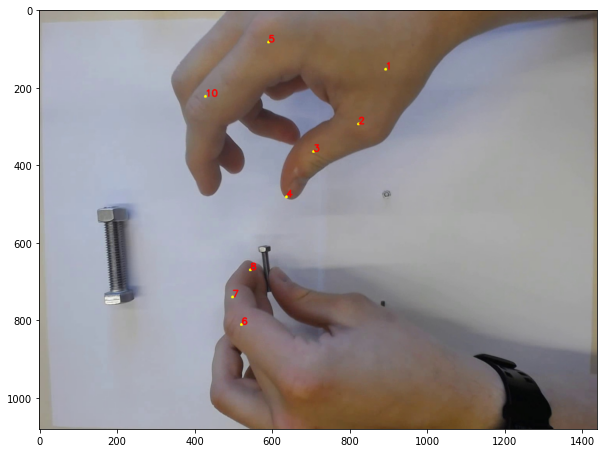

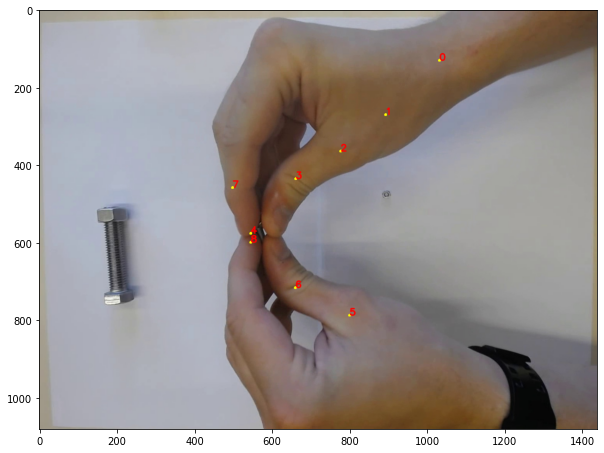

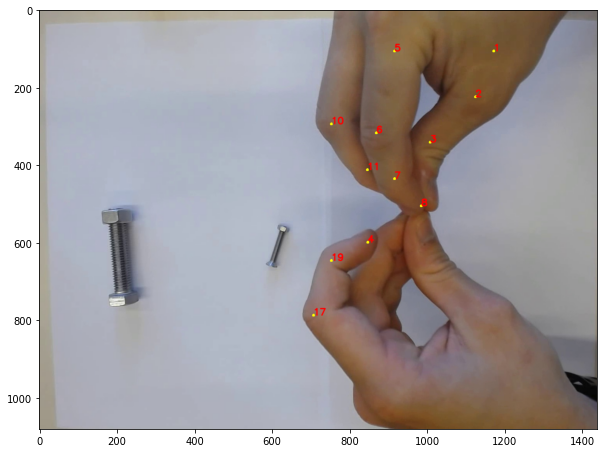

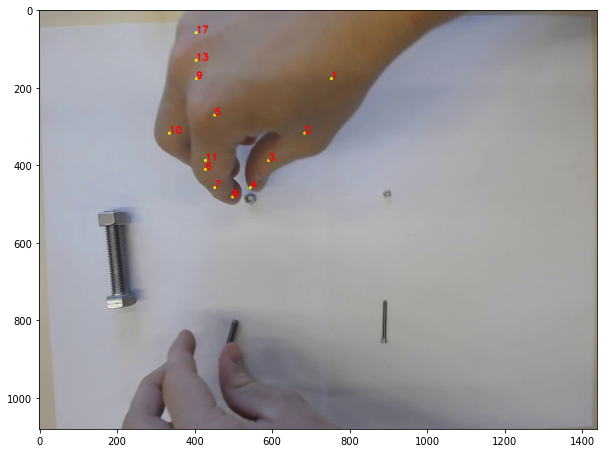

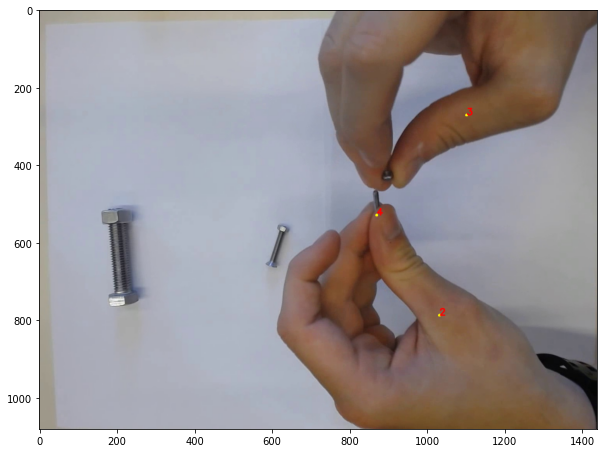

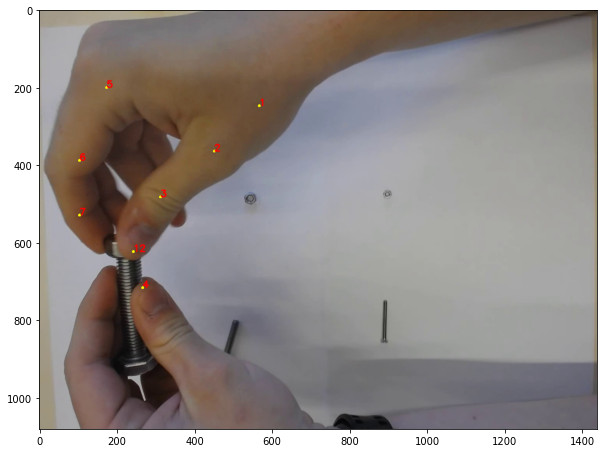

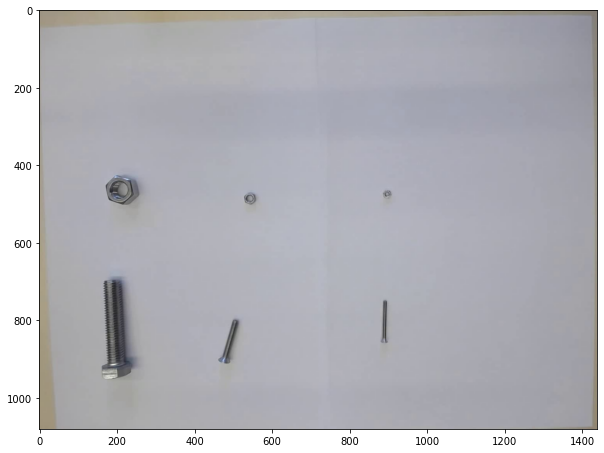

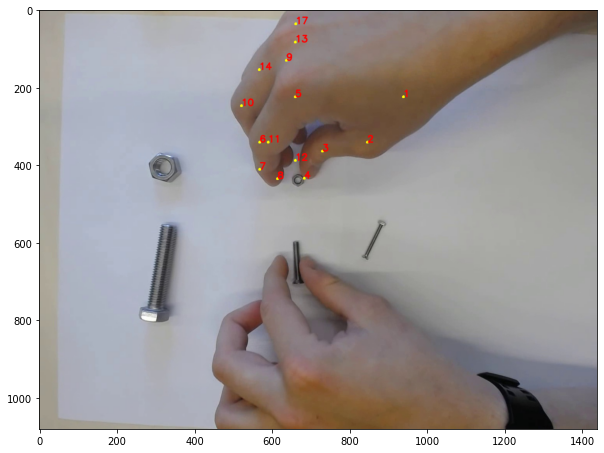

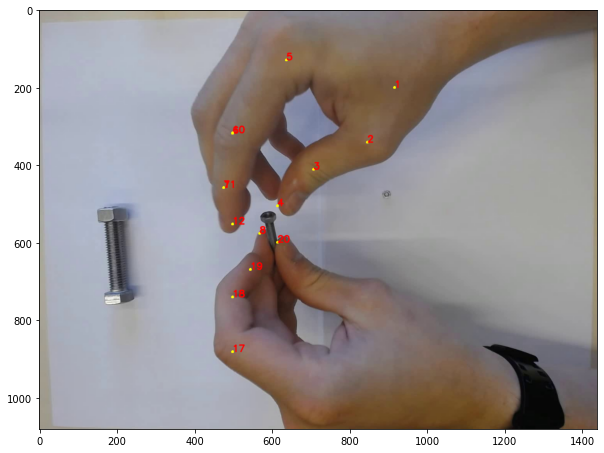

In [60]:
# Empty list to store the detected keypoints
points = []
s=time.time()
for img in range(len(prediction_images)):
      output = prediction_images[img]
      for i in range(nPoints):
          # confidence map of corresponding body's part.
          probMap = output[0, i, :, :]
          probMap = cv2.resize(probMap, (frameWidth, frameHeight))

          # Find global maxima of the probMap.
          minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

          if prob > threshold :
              cv2.circle(copy_prediction_images[img], (int(point[0]), int(point[1])), 3, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
              cv2.putText(copy_prediction_images[img], "{}".format(i), (int(point[0]), int(point[1])), cv2.FONT_HERSHEY_SIMPLEX, .8, (0, 0, 255), 2, lineType=cv2.LINE_AA)
              #print("the proabilty is :", prob)
              # Add the point to the list if the probability is greater than the threshold
              points.append((int(point[0]), int(point[1])))
              continue
              if prob < threshold:
                  break
          else :
              points.append(None)

      # Draw Skeleton

      for pair in POSE_PAIRS:
          partA = pair[0]
          partB = pair[1]

          if points[partA] and points[partB]:
              cv2.line(frame, points[partA], points[partB], (0, 255, 255), 2)
              cv2.circle(frame, points[partA], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
              cv2.circle(frame, points[partB], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
              print("yes")
              if prob > threshold :
                  None
              
              print(prob)
              break
              
              #applying while condition to wait for hand not detected

      plt.figure(figsize=[10,10])
      plt.imshow(cv2.cvtColor(copy_prediction_images[img], cv2.COLOR_BGR2RGB))
      #plt.figure(figsize=[10,10])
      #plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

     # filename ='Videos/' + "_frame%d.jpg" % count;count+=1
      cv2.imwrite(r'resultpres3.png', copy_prediction_images[img])


      print("Total time taken : {:.3f}".format(time.time() - s)) 

# New Section

In [21]:

frame = cv2.imread(r"/content/test3.PNG")
frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
aspect_ratio = frameWidth/frameHeight
threshold = 0.3

t = time.time()
# input image dimensions for the network
inHeight = 368
# inWidth = 368
inWidth = int(((aspect_ratio*inHeight)*8)//8)
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

output = net.forward()
print("time taken by network : {:.3f}".format(time.time() - t))

time taken by network : 11.766


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(22):
    probMap = output[0, i, :, :]
    probMap = cv2.resize(probMap, (frame.shape[1], frame.shape[0]))
    #plt.figure(figsize=[14,10])
    #plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    #plt.imshow(probMap, alpha=0.6)
   # plt.colorbar()
    #plt.axis("off")

yes
0.031241081655025482
Total time taken : 0.126


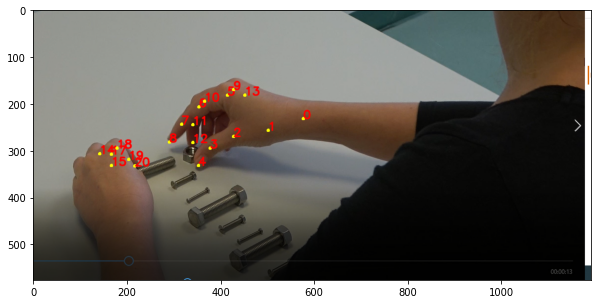

In [23]:
# Empty list to store the detected keypoints
points = []
s=time.time()
for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]
    probMap = cv2.resize(probMap, (frameWidth, frameHeight))

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    if prob > threshold :
        cv2.circle(frameCopy, (int(point[0]), int(point[1])), 3, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frameCopy, "{}".format(i), (int(point[0]), int(point[1])), cv2.FONT_HERSHEY_SIMPLEX, .8, (0, 0, 255), 2, lineType=cv2.LINE_AA)
        #print("the proabilty is :", prob)
        # Add the point to the list if the probability is greater than the threshold
        points.append((int(point[0]), int(point[1])))
        continue
        if prob < threshold:
            break
    else :
        points.append(None)

# Draw Skeleton

for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(frame, points[partA], points[partB], (0, 255, 255), 2)
        cv2.circle(frame, points[partA], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.circle(frame, points[partB], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
        print("yes")
        if prob > threshold :
            None
        
        print(prob)
        break
        
        #applying while condition to wait for hand not detected

plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))
#plt.figure(figsize=[10,10])
#plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


cv2.imwrite(r'resultpres3.png', frameCopy)


print("Total time taken : {:.3f}".format(time.time() - s)) 

# New Section

# New Section